In [47]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

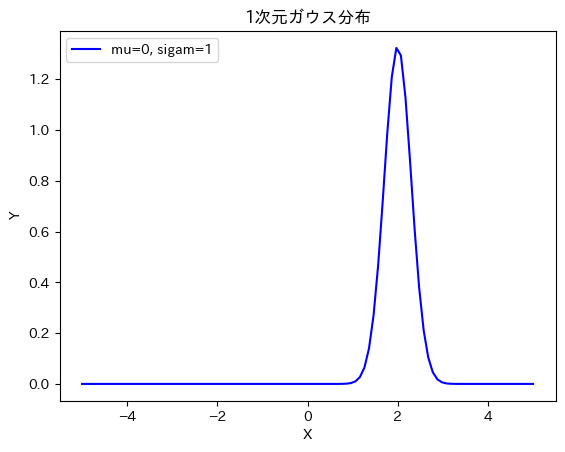

In [48]:
# 1次元ガウス分布
def gaussian1D(x, mu, sigma):
    z=-(x-mu)**2
    z/=2*sigma**2
    y=np.exp(z)
    y/=np.sqrt(2*np.pi*sigma**2)
    return y

# 平均パラメータ
mu=2.0
# 標準偏差
sigma=0.3
x=np.linspace(-5, 5, 100)
y=np.array([gaussian1D(xi, mu, sigma) for xi in x])

plt.title('1次元ガウス分布')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x, y, c='b', label='mu=0, sigam=1')
plt.legend()
plt.show()

In [49]:
# 平均パラメータ推定
def mu_inference(x):
    return np.mean(x)

# 分散パラメータ推定
def sigma_inference(x, mu):
    return np.std(x)

# 対数尤度
def log_likelihood(x, mu, sigma):
    lik=(np.sum(x) - len(x) * mu)**2
    lik/=-2*sigma**2
    lik-=len(x) * np.log(2*np.pi*sigma**2) * 0.5
    return lik

# フィッティング処理
def fit(x, epoch=100):
    # パラメータ初期値をガウス分布からサンプリング
    mu=np.random.normal(0,1)
    sigma=np.random.normal(0,1)
    # 初期値に対する対数尤度を計算
    lik=log_likelihood(x, mu, sigma)

    likes=[lik]
    for n in range(epoch):
        mu=mu_inference(x)
        sigma=sigma_inference(x, mu)
        lik=log_likelihood(x, mu, sigma)
        likes.append(lik)
        if abs(likes[n] - likes[n-1]) < 1e-7:
            return mu, sigma, likes
    return mu, sigma, likes

In [50]:
x=np.random.normal(2, 0.3, 100)
x

array([1.6661876 , 1.81422252, 2.14808233, 2.01861636, 1.72676325,
       2.00951346, 1.46596371, 1.75204231, 2.05527371, 2.2759317 ,
       2.39594951, 1.99042571, 1.50820009, 2.04983858, 2.1048002 ,
       1.88985687, 1.96617478, 2.05187108, 2.3197311 , 2.42585399,
       1.75789622, 2.06935636, 1.93244037, 2.01078473, 2.4332046 ,
       2.09676891, 1.77393975, 1.7168459 , 2.10409453, 1.96719447,
       1.74471007, 2.19624697, 2.53303152, 1.47504826, 2.19276507,
       1.95544903, 1.78088851, 2.57516949, 1.49967278, 1.86798904,
       1.70683681, 1.88475869, 2.13139524, 2.58796246, 1.8458761 ,
       1.91026419, 2.40020346, 1.76532886, 1.91196472, 2.09277209,
       2.5928266 , 1.64418905, 1.73350061, 1.66953067, 2.33229252,
       2.52095569, 2.25169116, 1.89271404, 2.62658822, 1.81908679,
       2.26908603, 1.67208178, 2.17546773, 2.3883184 , 1.9504799 ,
       1.98778454, 1.92557839, 1.96248327, 1.81283499, 1.78391735,
       2.0037155 , 2.5375697 , 2.24451239, 2.01073416, 2.31402

2.0273546880194804
0.2897690854997231


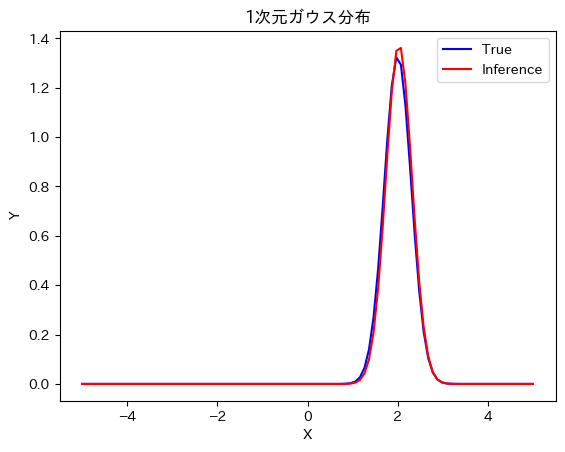

In [51]:
# パラメータ推定
mu, sigma, likes=fit(x)
print(mu)
print(sigma)
# 平均パラメータ
mu_true=2.0
# 標準偏差
sigma_true=0.3
x=np.linspace(-5, 5, 100)
y_true=np.array([gaussian1D(xi, mu_true, sigma_true) for xi in x])
y=np.array([gaussian1D(xi, mu, sigma) for xi in x])
plt.title('1次元ガウス分布')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x, y_true, c='b', label='True')
plt.plot(x, y, c='r', label='Inference')
plt.legend()
plt.show()

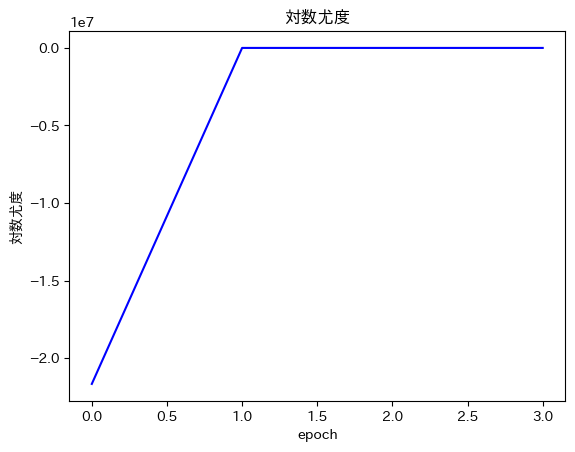

In [54]:
epoch=[e for e in range(len(likes))]
plt.plot(epoch, likes, c='b', label='log likelihood')
plt.title('対数尤度')
plt.xlabel('epoch')
plt.ylabel('対数尤度')
plt.show()